In [19]:
import pandas as pd
import numpy as np
import urllib
import requests
import re
import seaborn as sns
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
#from googlesearch import search
from urllib.error import HTTPError
import socket

In [20]:
import sys
sys.path.insert(1, 'C:/Users/Woon/Desktop/Columbia/Applied Analytics/Term3/Sentiment_SNP')

import helper_functions
from helper_functions import *

In [21]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context


In [22]:
url = "https://finviz.com/news.ashx"


headers = {"User-Agent": "Mozilla/5.0"}
cookies = {"CONSENT": "YES+cb.20210720-07-p0.en+FX+410"}

req = Request(url, headers=headers)
#requests.get(url, headers=headers,verify=False)

try:
    #urllib.request.urlretrieve(url)
    contents = urlopen(req).read() 
    #contents = urlopen(url).read()
    soup = BeautifulSoup(contents, features="html.parser")

    sentence2 = []

    for tag in soup.find_all('a'):

        sentence = tag.text.split(".")
        sentence2.append(sentence)
        #search_keywords=['patient access','patient reached','patients reached','patients treated','reimbursement','reimbursed','coverage', 'access performance', 'access rate', 'covered']

        # for sentence in sentences:
        #     for word in search_keywords:
        #         if word in sentence:
        #             url2.append(url)
        #             word2.append(word)
        #             sentence2.append(sentence)

        #print(sentence)


except urllib.error.HTTPError as err:
    print(err.code)

except socket.timeout as se:
    print("socket timeout")


# df = pd.DataFrame({'url': url2, 'keyword': word2, 'context':sentence2})
# df.to_csv('johnson.csv', index=False, encoding='utf-8')

In [23]:
from transformers import pipeline

import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('display.max_columns', None) 

In [24]:
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

In [25]:
df = pd.DataFrame(sentence2)

In [26]:
df['Headline'] = df[0]
df['Sentiment'] = -2
df = pd.DataFrame(list(zip(df['Headline'], df['Sentiment'])), columns=['Headline', 'Sentiment'])

In [27]:
i = []

for string in df['Headline']:
    i.append(count_words(string))

df['word_count'] = i


In [28]:
sentiment = [None] * len(df)
sentiment_score = [None] * len(df)
index = -1
for sentence in df['Headline']:
    index+=1
    result = sentiment_pipeline(sentence[:512])[0]
    sentiment[index] = result['label']
    sentiment_score[index] = result['score']
df['Sentiment'] = sentiment
df['Score'] = sentiment_score


In [29]:
df2 = df[df['word_count'] > 10]
df2['Headline_Lower'] = df2['Headline'].str.lower()
df2

,Headline,Sentiment,word_count,Score,Headline_Lower
18,BOK Is Ready to Provide More Liquidity If Need...,NEGATIVE,12,0.988596,bok is ready to provide more liquidity if need...
19,Record Share of UK Firms in China Pessimistic ...,POSITIVE,11,0.972321,record share of uk firms in china pessimistic ...
20,World Bank Sees Poverty in Kenya Resuming Pre-...,NEGATIVE,12,0.981105,world bank sees poverty in kenya resuming pre-...
25,Bali bomber released on parole after serving h...,NEGATIVE,11,0.882614,bali bomber released on parole after serving h...
27,Indian shares set to fall for third day on Fed...,NEGATIVE,12,0.996045,indian shares set to fall for third day on fed...
...,...,...,...,...,...
179,My First NFT Mint - Rally Rd 'The Future Is Hi...,NEGATIVE,16,0.957998,my first nft mint - rally rd 'the future is hi...
187,A quiet close to Friday's trading but Dow Jone...,POSITIVE,12,0.961830,a quiet close to friday's trading but dow jone...
192,Trading Psychology Advice - 2: Pursue Your De...,POSITIVE,12,0.995112,trading psychology advice - 2: pursue your de...
193,Trading Psychology Advice - 1: Get the Right ...,NEGATIVE,12,0.754755,trading psychology advice - 1: get the right ...


<AxesSubplot:xlabel='Sentiment', ylabel='Count'>

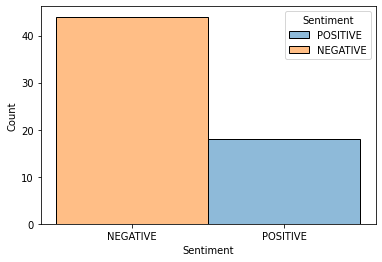

In [30]:
sns.histplot(x = 'Sentiment', data = df2[df2['Score'] > 0.8], hue = 'Sentiment', hue_order=['POSITIVE', 'NEGATIVE'])

In [31]:
from collections import defaultdict
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)


In [32]:

## Get the bar chart from 5 rated reviews ##
freq_dict = defaultdict(int)
for sent in df2["Headline_Lower"]:
    for word in generate_ngrams(sent,1):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(10), 'green')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"])
fig.append_trace(trace0, 1, 1)
#fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=600, width=600, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots');

In [33]:

## Get the bar chart from 5 rated reviews ##
freq_dict = defaultdict(int)
for sent in df2["Headline_Lower"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(10), 'green')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"])
fig.append_trace(trace0, 1, 1)
#fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=600, width=600, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots');

In [34]:

## Get the bar chart from 5 rated reviews ##
freq_dict = defaultdict(int)
for sent in df2["Headline_Lower"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(10), 'green')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"])
fig.append_trace(trace0, 1, 1)
#fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=600, width=600, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots');

In [35]:

## Get the bar chart from 5 rated reviews ##
freq_dict = defaultdict(int)
for sent in df2["Headline_Lower"]:
    for word in generate_ngrams(sent,4):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(10), 'green')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"])
fig.append_trace(trace0, 1, 1)
#fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=600, width=600, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots');